In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Charger les données à partir d'un fichier CSV
df = pd.read_csv('/content/drive/MyDrive/DeepLearning/CriptoCurrency.csv',parse_dates=['Date'])

Epoch 1/50
40/40 [==============================] - 1s 2ms/step - loss: 0.0024
Epoch 2/50
40/40 [==============================] - 0s 2ms/step - loss: 4.3941e-04
Epoch 3/50
40/40 [==============================] - 0s 2ms/step - loss: 4.2506e-04
Epoch 4/50
40/40 [==============================] - 0s 2ms/step - loss: 4.1745e-04
Epoch 5/50
40/40 [==============================] - 0s 2ms/step - loss: 4.3154e-04
Epoch 6/50
40/40 [==============================] - 0s 2ms/step - loss: 4.2026e-04
Epoch 7/50
40/40 [==============================] - 0s 2ms/step - loss: 3.6728e-04
Epoch 8/50
40/40 [==============================] - 0s 2ms/step - loss: 3.5801e-04
Epoch 9/50
40/40 [==============================] - 0s 2ms/step - loss: 4.7259e-04
Epoch 10/50
40/40 [==============================] - 0s 2ms/step - loss: 4.3463e-04
Epoch 11/50
40/40 [==============================] - 0s 2ms/step - loss: 3.9300e-04
Epoch 12/50
40/40 [==============================] - 0s 2ms/step - loss: 3.9325e-04
Epoch

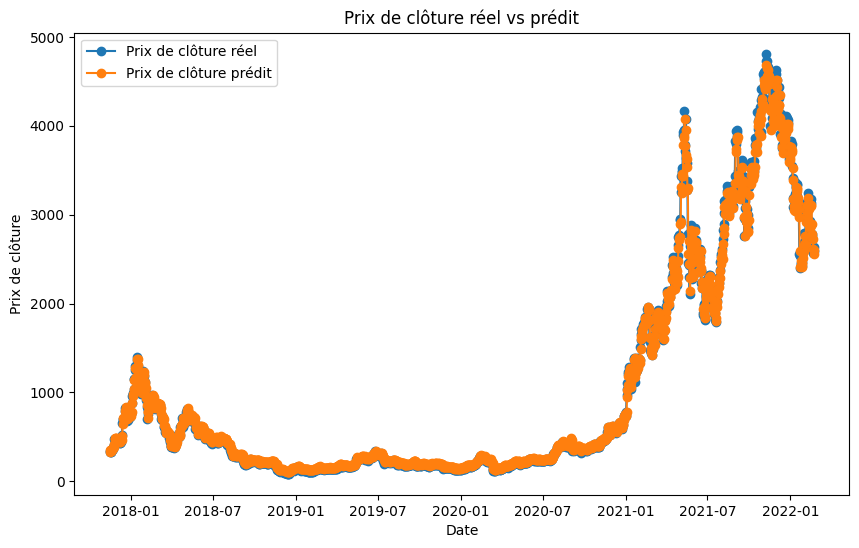

In [3]:
# Trier le DataFrame par date
df = df.sort_values('Date')

# Utiliser les prix de clôture ('Close') pour la prédiction
data = df['Close'].values.reshape(-1, 1)

# Normaliser les données
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

# Créer des séquences et des étiquettes
sequence_length = 5  # Vous pouvez ajuster cela en fonction de vos préférences
sequences = []
labels = []

for i in range(len(data_normalized) - sequence_length):
    seq = data_normalized[i:i+sequence_length]
    label = data_normalized[i+sequence_length:i+sequence_length+1]
    sequences.append(seq)
    labels.append(label)

sequences = np.array(sequences)
labels = np.array(labels)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(sequences, labels, test_size=0.2, random_state=42)

# Construire le modèle RNN
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Entraîner le modèle
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Évaluer le modèle
loss = model.evaluate(X_test, y_test)
print(f'Erreur quadratique moyenne sur les données de test : {loss}')

# Prédire les prix de clôture
predicted = model.predict(sequences)

# Inverser la transformation pour obtenir les prix de clôture réels
predicted_prices = scaler.inverse_transform(predicted)

# Tracer les résultats
plt.figure(figsize=(10, 6))
plt.plot(df['Date'][sequence_length:], data[sequence_length:], label='Prix de clôture réel', marker='o')
plt.plot(df['Date'][sequence_length:], predicted_prices, label='Prix de clôture prédit', marker='o')
plt.title('Prix de clôture réel vs prédit')
plt.xlabel('Date')
plt.ylabel('Prix de clôture')
plt.legend()
plt.show()
